# ICR - Identifying Age-Related Conditions

 The goal of the competition is to 'Use Machine Learning to detect conditions with measurements of anonymous characteristics' to help researchers discover the relationship between measurements of certain characteristics and potential patient conditions. Predictive models can be developed to shorten the process of determining if someone has any one of the three medical conditions given in the competition dataset by the traditional long and intrusive process of collecting information from the patients. The model should be capable of predicting the Class 1 which analyses if the person has one or more of any one of the three medical conditions in the log-loss based binary classification involved. The Class 0 would be the prediction of patients who were diagnosed with none of the three medical conditions.

 The evaluation method for the submissions to be made is carried out using balanced logarithmic loss. Each Class 1 or Class 0 observation based on probability impacts the final score in a equally important manner roughly.
    
    The overall effect is such that each class is roughly equally important for the final score.

Each observation is either of class 0 or of class 1. For each observation, one must submit a probability for each class.

The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, each predicted probability 
 is replaced with 
.

Submission File
For each id in the test set, you must predict a probability for each of the two classes. The file should contain a header and have the following format:</span>


In [1]:
import pandas as pd
import numpy as np
    

In [2]:
df=pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
df.head().T

,0,1,2,3,4
Id,000ff2bfdfe9,007255e47698,013f2bd269f5,043ac50845d5,044fb8a146ec
AB,0.209377,0.145282,0.47003,0.252107,0.380297
AF,3109.03329,978.76416,2635.10654,3819.65177,3733.04844
AH,85.200147,85.200147,85.200147,120.201618,85.200147
AM,22.394407,36.968889,32.360553,77.112203,14.103738
AR,8.138688,8.138688,8.138688,8.138688,8.138688
AX,0.699861,3.63219,6.73284,3.685344,3.942255
AY,0.025578,0.025578,0.025578,0.025578,0.05481
AZ,9.812214,13.51779,12.82457,11.053708,3.396778
BC,5.555634,1.2299,1.2299,1.2299,102.15198


In [3]:
df['EJ'] = df['EJ'].map({'A':0, 'B':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [4]:
# use forward fill to replace NaN with the previous valid value in each column.
df.fillna(method='ffill', inplace=True)

df = df.astype({'EJ':'float64', 'Class': 'float64'})

print(df.info())
df.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

,0,1,2,3,4
Id,000ff2bfdfe9,007255e47698,013f2bd269f5,043ac50845d5,044fb8a146ec
AB,0.209377,0.145282,0.47003,0.252107,0.380297
AF,3109.03329,978.76416,2635.10654,3819.65177,3733.04844
AH,85.200147,85.200147,85.200147,120.201618,85.200147
AM,22.394407,36.968889,32.360553,77.112203,14.103738
AR,8.138688,8.138688,8.138688,8.138688,8.138688
AX,0.699861,3.63219,6.73284,3.685344,3.942255
AY,0.025578,0.025578,0.025578,0.025578,0.05481
AZ,9.812214,13.51779,12.82457,11.053708,3.396778
BC,5.555634,1.2299,1.2299,1.2299,102.15198


0.0    509
1.0    108
Name: Class, dtype: int64


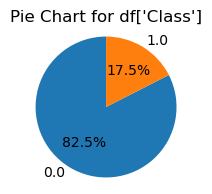

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{0: 0.6060903732809431, 1: 2.8564814814814814}


In [5]:
cls = df['Class']
# Count the occurrences of each unique value in 'col'
value_counts = cls.value_counts()
print(value_counts)

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(2, 2))
# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Add a title
plt.title("Pie Chart for df['Class']")
# Show the plot
plt.show()

# Handle class imbalance
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=cls)
# Convert class weights to a dictionary format required by LightGBM
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(class_weight_dict)

In [6]:
df_pr = df.drop(['Id'], axis = 1)

# Normalizing to the range of 0 to 1
min_val = df_pr.min()
max_val = df_pr.max()
df_norm = (df_pr - min_val) / (max_val - min_val)

df_norm.head().T

,0,1,2,3,4
AB,0.021082,0.010541,0.063949,0.028110,0.049192
AF,0.102347,0.027589,0.085715,0.127285,0.124246
AH,0.000000,0.000000,0.000000,0.019180,0.000000
AM,0.030632,0.053864,0.046519,0.117854,0.017417
AR,0.000000,0.000000,0.000000,0.000000,0.000000
AX,0.000000,0.078048,0.160575,0.079462,0.086300
AY,0.000000,0.000000,0.000000,0.000000,0.002841
AZ,0.180337,0.284500,0.265013,0.215235,0.000000
BC,0.002958,0.000000,0.000000,0.000000,0.069008
BD,0.047364,0.074042,0.067011,0.048203,0.078555


In [7]:
from sklearn.metrics import log_loss
def balanced_log_loss(y_true, y_pred):
#     n_true = np.count_nonzero(y_true==1)
    y_true = np.array(y_true).astype(int)  # Convert y_true to a NumPy array with integer data type
    nc = np.bincount(y_true)
    return log_loss(y_true, y_pred, sample_weight = 1.0/nc[y_true], eps=1e-15)

LGBM Classifier
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 92, number of negative: 401
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6898
[LightGBM] [Info] Number of data points in the train set: 493, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186613 -> initscore=-1.472173
[LightGBM] [Info] Start training from score -1.472173
[1]	training's binary_logloss: 0.476009
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.470988
[3]	training's binary_logloss: 0.466192
[4]	training's binary_logloss: 0.461537
[5]	training's binary_logloss: 0.457598
[6]	training's binary_logloss: 0.453537
[7]	training's binary_logloss: 0.449646
[8]	training's binary_logloss: 0.445913
[9]	training's binary_logloss: 0.

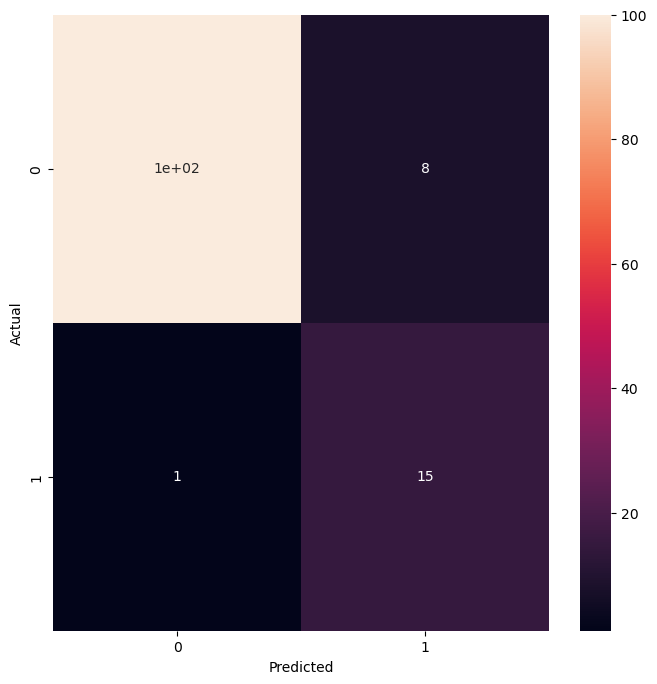

In [8]:
print("LGBM Classifier")

import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Use warnings.filterwarnings() to ignore specific warning types
warnings.filterwarnings("ignore")

X = df_norm.drop(['Class'], axis = 1)
y = df_norm['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Define the hyperparameters for LightGBM
params = {
    'objective': 'binary',           # For binary classification
    'boosting_type': 'gbdt',         # Gradient Boosting Decision Tree
    'metric': 'binary_logloss',      # Logarithmic loss for binary classification
    'num_leaves': 31,                # Maximum number of leaves in one tree
    'learning_rate': 0.01,           # Learning rate for boosting
    'feature_fraction': 0.9,         # Percentage of features to consider for each tree
    'bagging_fraction': 0.8,         # Percentage of data samples used for bagging
    'bagging_freq': 5,  # Frequency for bagging
    'bagging_seed': 5,
    'verbose': 1,                    # 0: Silent, 1: Print info during training
    'early_stopping_rounds': 10,     # Number of rounds without improvement to stop training
    'is_unbalance': True,            # Handle class imbalance automatically (reduced 0.91 to 0.85)
    'max_depth': 2,                  # Maximum tree depth for base learners, <=0 means no limit.
    'min_child_weight':0,            # Minimum sum of instance weight (Hessian) needed in a child (leaf).
    'reg_alpha': 0.1,                # L1 regularization term (default is 0)
    'reg_lambda': 0.1,               # L2 regularization term (default is 0)
}

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Train the LightGBM model
model_lgb = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data], early_stopping_rounds=10)

y_pred=model_lgb.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = [1.0 if p >= 0.5 else 0.0 for p in y_pred]

confusion=confusion_matrix(y_test,y_pred_binary)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred_binary))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate balanced log loss
bal_logloss = balanced_log_loss(y_test, y_pred_binary)
print("balanced_log_loss is: ",bal_logloss)

# Reset the warning filters to default if needed
warnings.filterwarnings("default")

##### https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

https://en.m.wikipedia.org/wiki/Cross_entropy

In [9]:
import pandas as pd

test_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

test_ds_pd = test_df
test_df_columns = test_ds_pd.columns.tolist()
FEATURE_COLUMNS = [i for i in test_df.columns if i not in ["Id"]]
TEST_FEATURE_COLUMNS = [i for i in FEATURE_COLUMNS \
                        if i in test_df_columns and i != "Class"]
test_ds_pd = test_ds_pd[TEST_FEATURE_COLUMNS]

test_ds_pd['EJ'] = test_ds_pd['EJ'].map({'A':0, 'B':1})
# use forward fill to replace NaN with the previous valid value in each column.
test_ds_pd.fillna(method='ffill', inplace=True)
test_ds_pd = test_ds_pd.astype({'EJ':'float64'})
# Normalizing to the range of 0 to 1
min_val = test_ds_pd.min()
max_val = test_ds_pd.max()
df_norm = (test_ds_pd - min_val) / (max_val - min_val)

predictions = model_lgb.predict(df_norm)
n_predictions= [[round(abs(i-1), 8), i] for i in predictions.ravel()]
print(n_predictions)

[[0.77413569, 0.22586431486160666], [0.77413569, 0.22586431486160666], [0.77413569, 0.22586431486160666], [0.77413569, 0.22586431486160666], [0.77413569, 0.22586431486160666]]


/tmp/ipykernel_20/1917825917.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ds_pd['EJ'] = test_ds_pd['EJ'].map({'A':0, 'B':1})
/tmp/ipykernel_20/1917825917.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ds_pd.fillna(method='ffill', inplace=True)


In [10]:
sample_submission = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv")
sample_submission[['class_0', 'class_1']] = n_predictions
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission.head()

,Id,class_0,class_1
0,00eed32682bb,0.774136,0.225864
1,010ebe33f668,0.774136,0.225864
2,02fa521e1838,0.774136,0.225864
3,040e15f562a2,0.774136,0.225864
4,046e85c7cc7f,0.774136,0.225864
